In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:
def fourier_series_encoding(df, col, period, n_terms=3, prefix=None):
    """
    Encodes any cyclic variable using a Fourier series expansion.
    
    Parameters:
    - df: input DataFrame containing the cyclic variable
    - col: name of the column with cyclic values (e.g., 1-12 for months, 0-23 for hours)
    - period: full cycle length (e.g., 12 for months, 7 for weekdays, 24 for hours)
    - n_terms: number of Fourier terms (harmonics) to include
    - prefix: optional string prefix for generated columns (default = column name)
    
    Returns:
    - DataFrame with additional sine and cosine Fourier features
    """
    df = df.copy()
    if prefix is None:
        prefix = col

    df[f'{prefix}_f0'] = 1  

    for k in range(1, n_terms + 1):
        df[f'{prefix}_sin_{k}'] = np.sin(2 * np.pi * k * df[col] / period)
        df[f'{prefix}_cos_{k}'] = np.cos(2 * np.pi * k * df[col] / period)
    
    return df


In [27]:
# Example usage: 
df_month = pd.DataFrame({'month': np.arange(1, 37)})
encoded_month = fourier_series_encoding(df_month, col='month', period=12, n_terms=3)

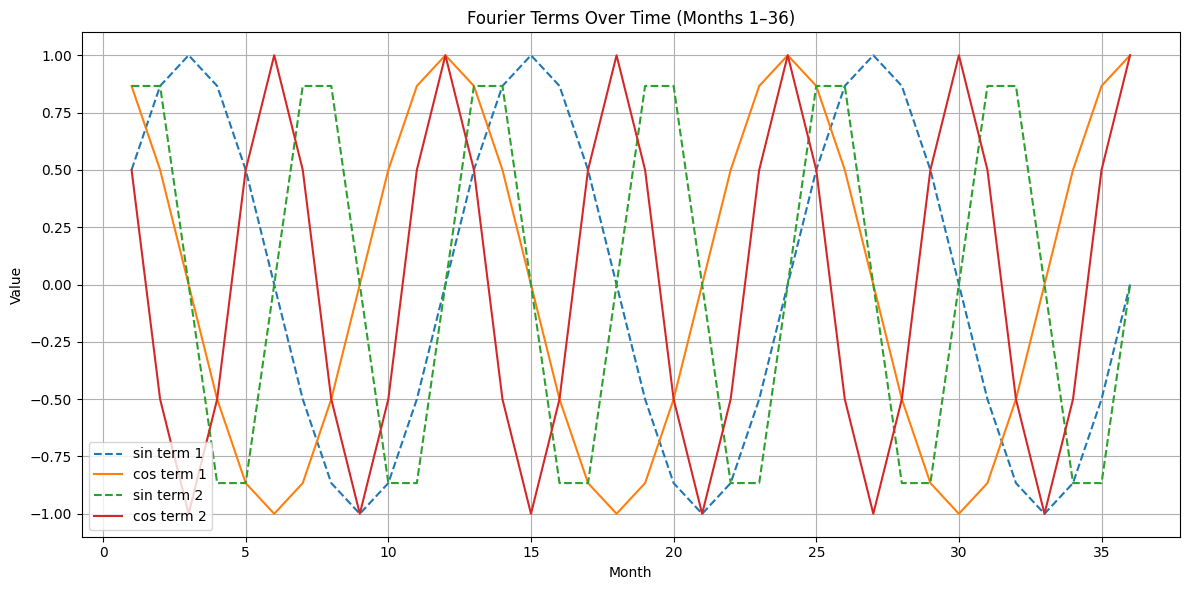

In [28]:
plt.figure(figsize=(12, 6))

for k in range(1, 3):
    plt.plot(encoded_month['month'], encoded_month[f'month_sin_{k}'], label=f'sin term {k}', linestyle='--')
    plt.plot(encoded_month['month'], encoded_month[f'month_cos_{k}'], label=f'cos term {k}')

plt.title("Fourier Terms Over Time (Months 1–36)")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()